Task: ***Car Prediction Using Machine Learning***



# Name : Monika Choudhary
#Batch : *JUNE*-P2 OIB-SIP
#*Data Science* as a *intern*

Importing the Dependencies


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Processing

In [3]:
#loading the data
car_dataset = pd.read_csv("/content/car data.csv")

In [4]:
# checking first 5 rows of data
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#checking no. of rows and columns
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#checking the no. of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
#checking the distribution categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64



Encoding the Categorical Data

In [9]:
#encoding the Fuel_Type column petrol = 0 , diseal = 1 and CNG = 2
car_dataset.replace({'Fuel_Type':{'Petrol':0 ,'Diesel':1,'CNG':2}},inplace=True)

#encoding the Selling_type Dealer = 0 , Individual = 1
car_dataset.replace({'Selling_type' : {'Dealer':0 ,'Individual':1}},inplace=True)

#encoding the Transmission column Manual = 0 , Automatic = 1
car_dataset.replace({'Transmission' : {'Manual':0 ,'Automatic':1}},inplace=True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [11]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y =car_dataset['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

Splitting Data into Training data Testing data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,random_state=2)

Model Training

In [13]:
#loading Linear Regression
linear_reg_model = LinearRegression()


In [15]:
linear_reg_model.fit(X_train, Y_train)


LinearRegression()

Model Evaluation

In [16]:
#predication on training data
training_data_prediction = linear_reg_model.predict(X_train)

In [17]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370215


Visualize the actual price and predicted price

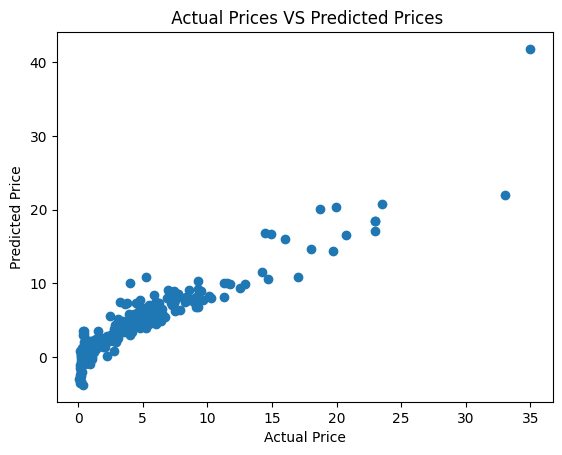

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

In [19]:
#prediction on test data
test_data_prediction = linear_reg_model.predict(X_test)


In [20]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365861023210703


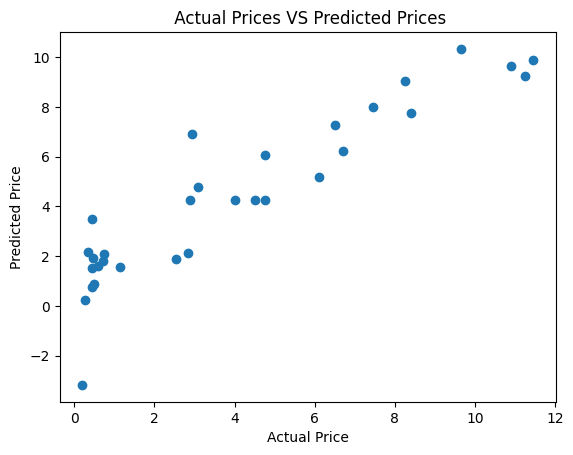

In [21]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

Lasso Regression

In [22]:
#loading LAsso Regression
lasso_reg_model = Lasso()


In [23]:
lasso_reg_model.fit(X_train, Y_train)


Lasso()

Model Evaluation

In [24]:
#predication on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8424480718240743


Visualize the actual price and predicted price

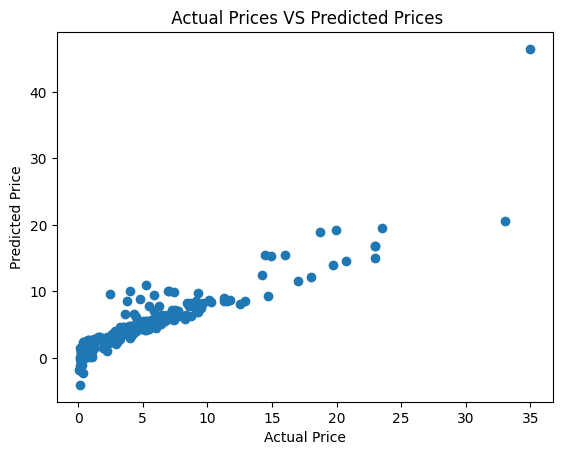

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()

In [27]:
#prediction on test data
test_data_prediction = lasso_reg_model.predict(X_test)


In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709763132343395


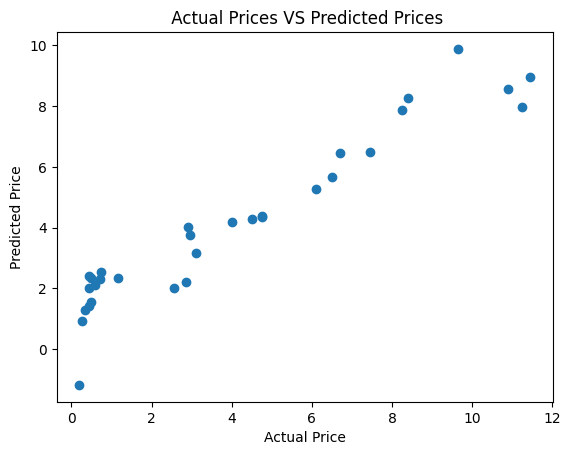

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices VS Predicted Prices")
plt.show()